# HW pandas

### 1. Построить гистограммы 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
reads_inf = pd.read_csv('https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv')

In [61]:
reads_inf

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,337,8056,7542,471,58,7,NaN,63.0,47.0,367.0,NaN,0.004584,0.045444,0.007767
59,338,8061,7967,62,29,5,17.0,NaN,26.0,33.0,0.001060,0.002207,0.003992,NaN
60,339,8062,8002,48,14,3,14.0,14.0,33.0,NaN,0.001076,0.002953,NaN,0.001322
61,340,8061,7918,146,16,4,NaN,75.0,43.0,33.0,NaN,0.005307,0.002951,0.008808


In [62]:
reads_inf_nucl = reads_inf.drop(["reads_all", "matches", "mismatches", "deletions", "insertions", "A_fraction", \
                                "T_fraction", "G_fraction", "C_fraction"], axis=1)

In [63]:
reads_inf_nucl

,pos,A,C,T,G
0,279,7911.0,54.0,11.0,NaN
1,280,NaN,16.0,13.0,19.0
2,281,NaN,24.0,4.0,24.0
3,282,105.0,11.0,395.0,NaN
4,283,46.0,NaN,93.0,31.0
...,...,...,...,...,...
58,337,NaN,63.0,47.0,367.0
59,338,17.0,NaN,26.0,33.0
60,339,14.0,14.0,33.0,NaN
61,340,NaN,75.0,43.0,33.0


<AxesSubplot:xlabel='pos'>

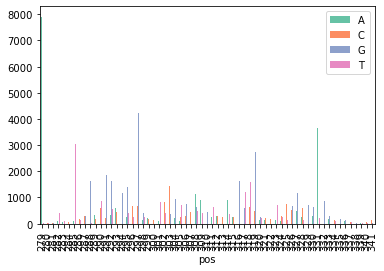

In [69]:
sns.set_palette("Set2")
reads_inf_nucl.plot(x = "pos", y = ["A", "C", "G", "T"],  kind = 'bar')

In [91]:
reads_inf_nucl_in = reads_inf_nucl.set_index("pos")

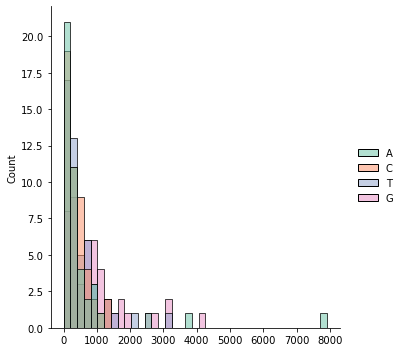

In [81]:
sns.displot(reads_inf_nucl_in)

In [125]:
reads_inf_nucl.iloc[:, 1:] = reads_inf_nucl.iloc[:, 1:].div(reads_inf_nucl.iloc[:, 1:].sum(1), axis=0).mul(100)

In [126]:
reads_inf_nucl

,pos,A,C,T,G
0,279,99.185055,0.677031,0.137914,NaN
1,280,NaN,33.333333,27.083333,39.583333
2,281,NaN,46.153846,7.692308,46.153846
3,282,20.547945,2.152642,77.299413,NaN
4,283,27.058824,NaN,54.705882,18.235294
...,...,...,...,...,...
58,337,NaN,13.207547,9.853249,76.939203
59,338,22.368421,NaN,34.210526,43.421053
60,339,22.950820,22.950820,54.098361,NaN
61,340,NaN,49.668874,28.476821,21.854305


<AxesSubplot:xlabel='pos'>

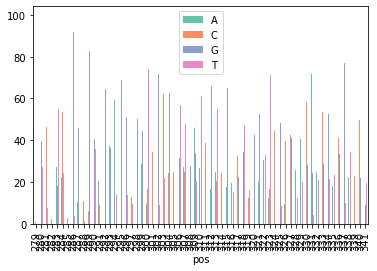

In [127]:
reads_inf_nucl.plot(x = "pos", y = ["A", "C", "G", "T"], kind = 'bar')

### 2. Отбор необходимых данных

In [14]:
mean_matches = reads_inf["matches"].mean()

In [15]:
train_part = reads_inf.loc[reads_inf["matches"] > mean_matches]

In [35]:
train_part = train_part.filter(items=["pos", "reads_all", "mismatches", "deletions", "insertions"])

In [36]:
train_part.to_csv('train_part', sep='\t', index=False)

### 3. Сделать небольшой EDA

In [33]:
data_path = 'Mall_Customers.csv'
customers_data = pd.read_csv(data_path)

In [34]:
customers_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
customers_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [89]:
customers_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

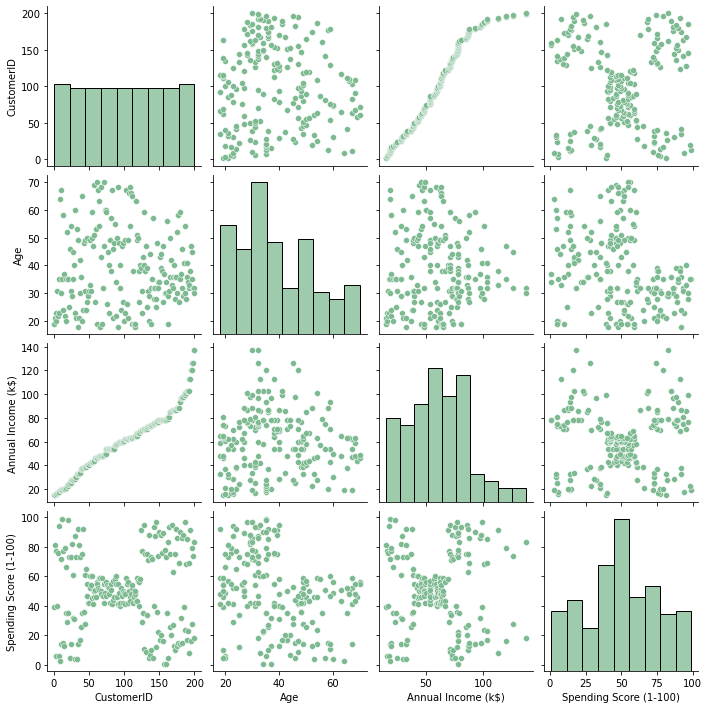

In [30]:
sns.set_palette("crest")
sns.pairplot(customers_data)

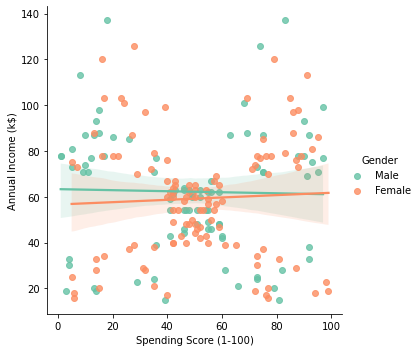

In [27]:
sns.set_palette("Set2")
sns.lmplot(y='Annual Income (k$)', x='Spending Score (1-100)', hue='Gender', data=customers_data)

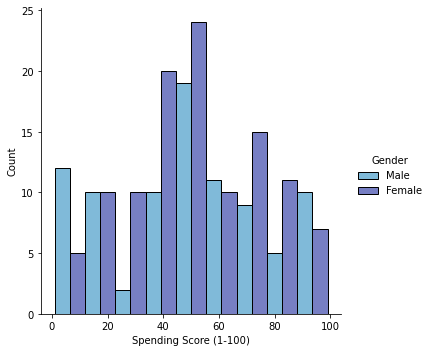

In [28]:
sns.set_palette("icefire")
sns.displot(customers_data, x="Spending Score (1-100)", hue="Gender", multiple="dodge")

### 4. Работа с реальными данными

In [36]:
def read_gff(gff_file):
    f = open(gff_file, "r")
    for x in f:
        df = pd.DataFrame(x)
    return df

In [38]:
f = open("small_gff.gff", "r")
print(f.read())

# gff3-format
Reference_10	barrnap:0.9	rRNA	67122	68652	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	68981	72061	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	469298	470826	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	471166	474246	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	3629599	3632680	0.0	-	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	3633020	3634549	0.0	-	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	6168837	6170367	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	6170707	6173787	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA


In [42]:
df = pd.DataFrame(columns=['Chromosome', 'Source', 'Type', 'Start', 'End', 'Score', 'Strand', 'Phase', 'Attributes'])

In [130]:
file = open("small_gff.gff", "r")
new_list = []
for line in file:
    for i in line:
            i = line.rstrip('\n').split('\t')
    new_list.append(i)
new_list.pop(0)

In [135]:
for i in new_list:
    for j in i:
        print(j)

Reference_10
barrnap:0.9
rRNA
67122
68652
0.0
+
.
Name=16S_rRNA;product=16S ribosomal RNA
Reference_10
barrnap:0.9
rRNA
68981
72061
0.0
+
.
Name=23S_rRNA;product=23S ribosomal RNA
Reference_10
barrnap:0.9
rRNA
469298
470826
0.0
+
.
Name=16S_rRNA;product=16S ribosomal RNA
Reference_10
barrnap:0.9
rRNA
471166
474246
0.0
+
.
Name=23S_rRNA;product=23S ribosomal RNA
Reference_10
barrnap:0.9
rRNA
3629599
3632680
0.0
-
.
Name=23S_rRNA;product=23S ribosomal RNA
Reference_10
barrnap:0.9
rRNA
3633020
3634549
0.0
-
.
Name=16S_rRNA;product=16S ribosomal RNA
Reference_10
barrnap:0.9
rRNA
6168837
6170367
0.0
+
.
Name=16S_rRNA;product=16S ribosomal RNA
Reference_10
barrnap:0.9
rRNA
6170707
6173787
0.0
+
.
Name=23S_rRNA;product=23S ribosomal RNA
